In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset
import torch.optim as optim
from tqdm import tqdm, trange
import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import os
import pandas as pd

    Unnamed: 0       model_name  sigma_g  eps_rel             mse   
4           18  model_005_50.pt      0.0      0.1  tensor(0.0150)  \
10          31   model_01_50.pt      0.2      0.1  tensor(0.0112)   
16          19   model_02_50.pt      0.2      0.1  tensor(0.0103)   
22          41   model_03_50.pt      0.4      0.1  tensor(0.0088)   
28          38   model_04_50.pt      0.5      0.1  tensor(0.0082)   
34          29   model_05_50.pt      0.5      0.1  tensor(0.0074)   
40           2    model_1_50.pt      0.9      0.1  tensor(0.0072)   

               psnr            ssim  
4   tensor(18.2851)  tensor(0.4545)  
10  tensor(19.5548)  tensor(0.5868)  
16  tensor(19.8706)  tensor(0.6080)  
22  tensor(20.5870)  tensor(0.6364)  
28  tensor(20.8896)  tensor(0.6475)  
34  tensor(21.3215)  tensor(0.6402)  
40  tensor(21.4433)  tensor(0.6288)  


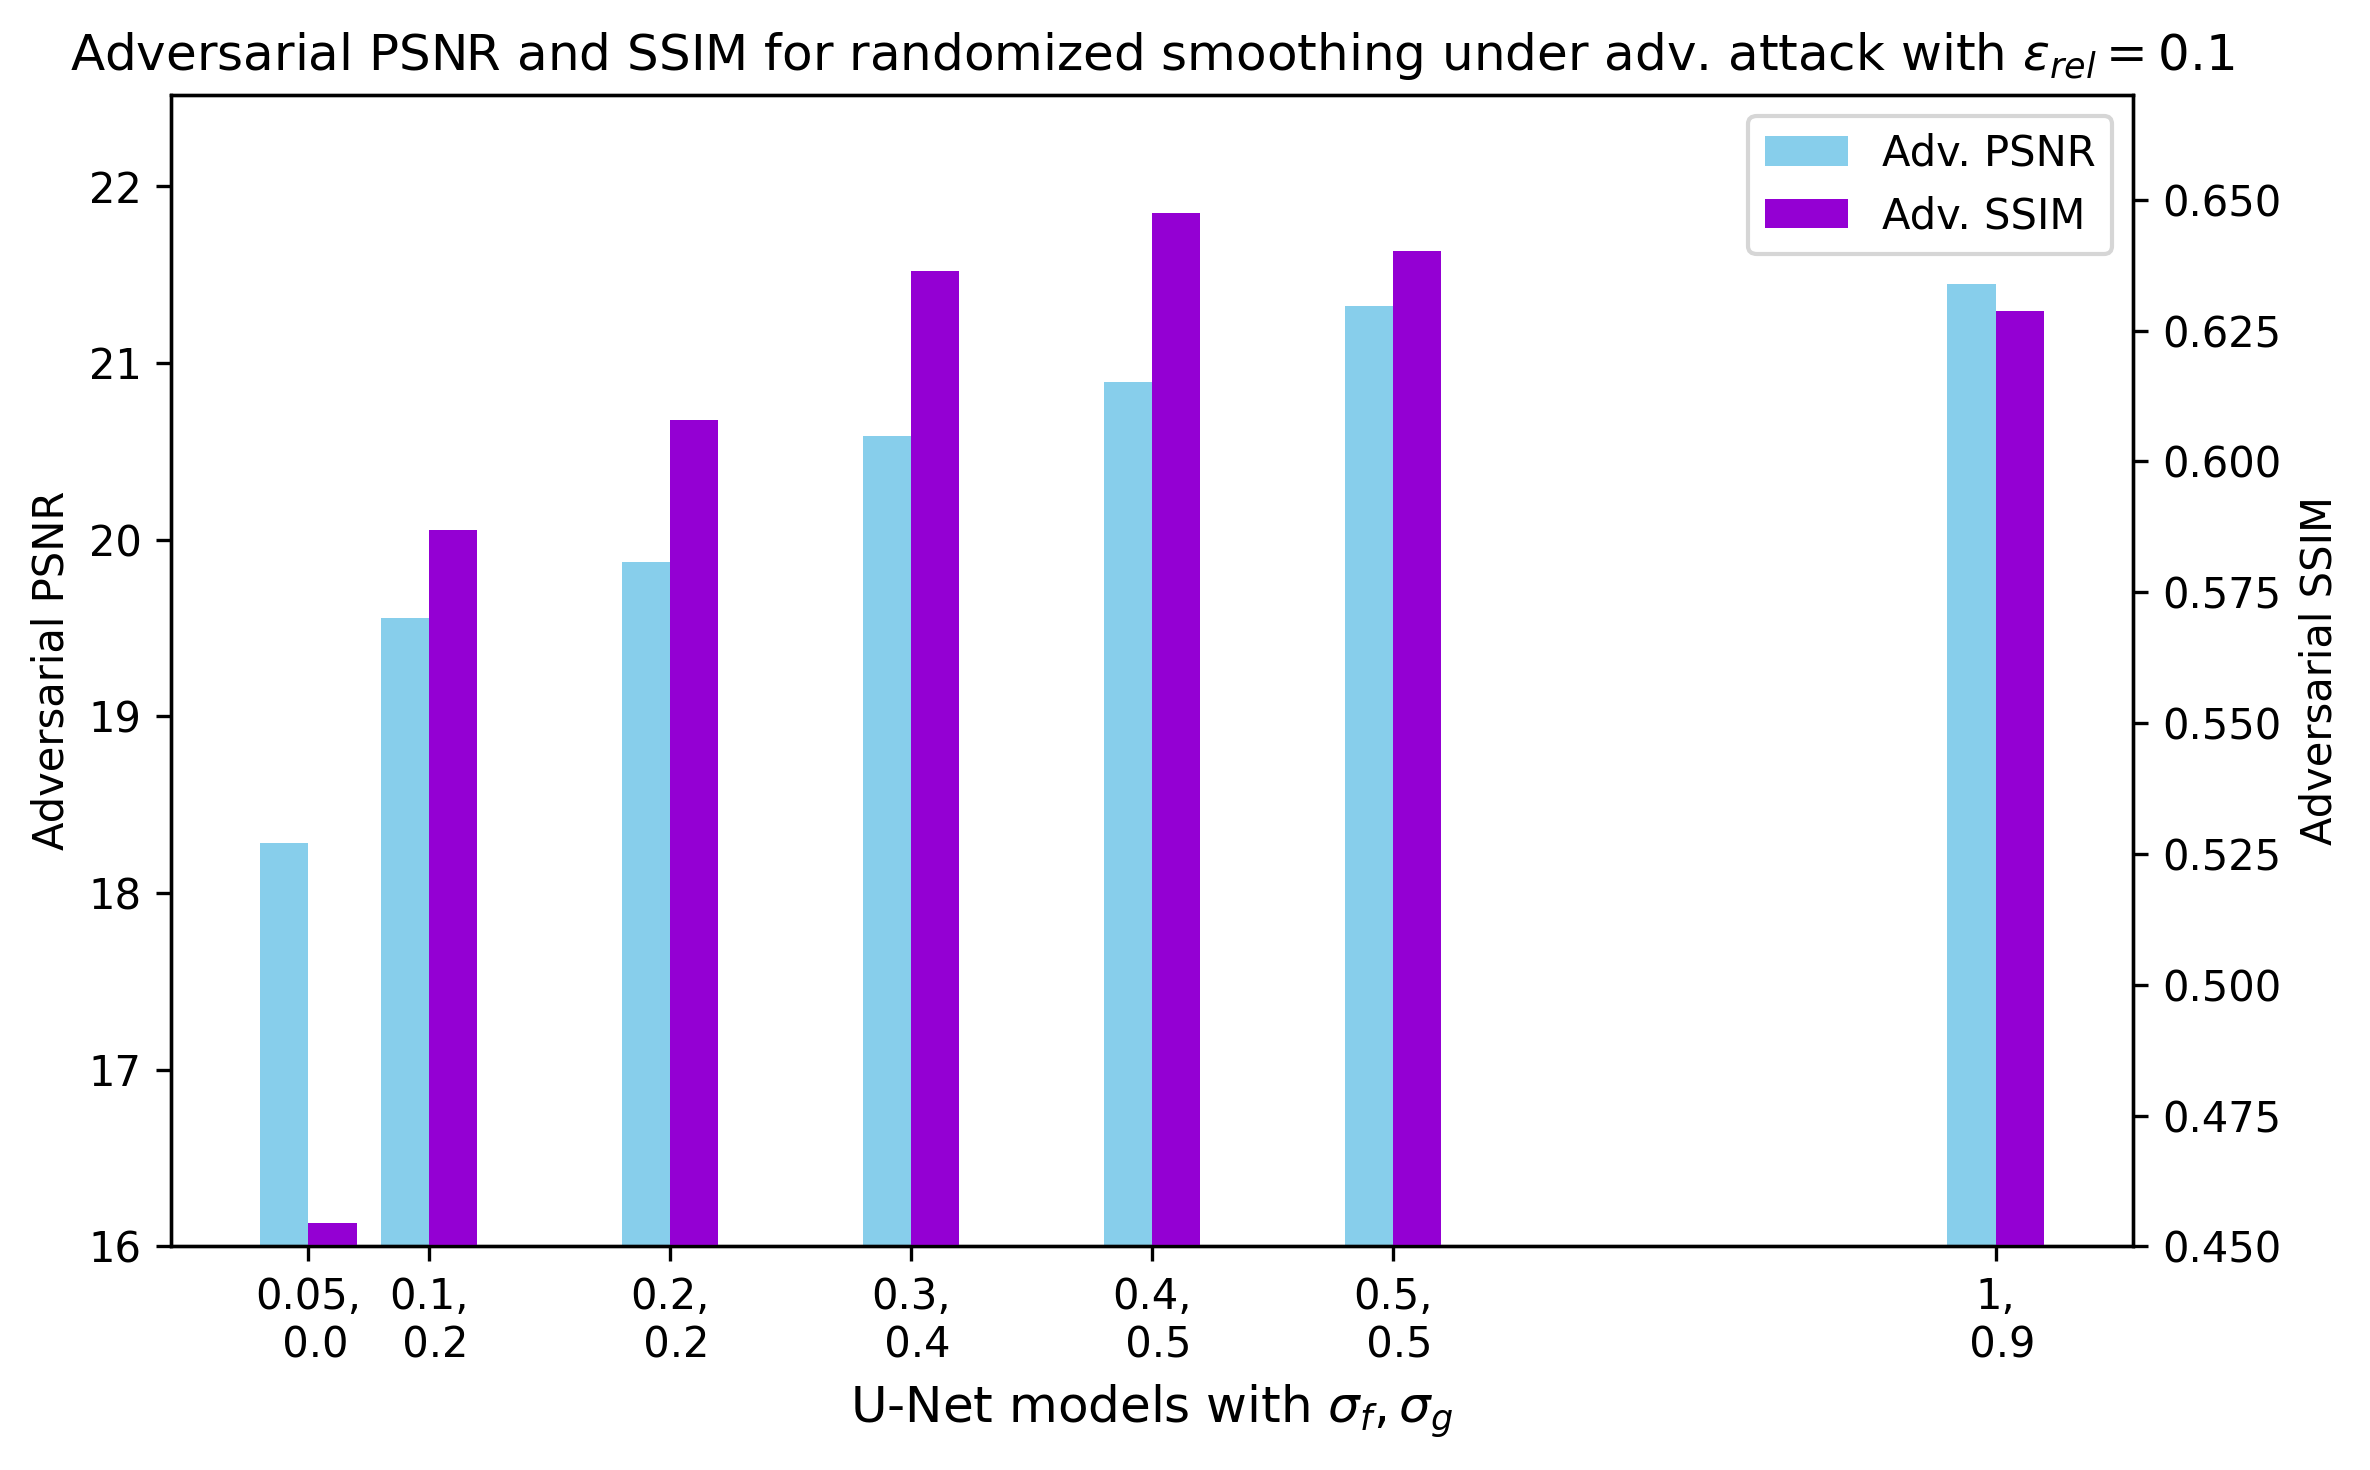

In [ ]:
os.chdir('/faidra/project/BT')
file = r'./eval_results/eval_results.csv' 
# set dpi to 300 for high resolution
plt.rcParams['figure.dpi'] = 300
df = pd.read_csv(file)
sigma_fs = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
x_axis = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]

# get only the rows for eps_rel = 0.1
eps_rel = 0.1
df = df[df['eps_rel'] == eps_rel]
print(df)

# create list with all sigma_g entries
sigma_g = df['sigma_g'].tolist()

# create list named psnr_values with all psnr entries without the tensor prefix and closing bracket
psnr_values = df['psnr'].tolist()
psnr_values = [float(x[7:-1]) for x in psnr_values]

# do the same for ssim_values
ssim_values = df['ssim'].tolist()
ssim_values = [float(x[7:-1]) for x in ssim_values]

# create plot with two y axes
# create a bar plot with the psnr values for each sigma_f value in sigma_fs
fig, ax = plt.subplots()
ln1=ax.bar(np.array(x_axis)-0.01, psnr_values, width=0.02, color='skyblue', label='Adv. PSNR')
ax.set_ylim(bottom=16)

# make plot wider 
plt.gcf().set_size_inches(8, 5)
ax.set_ylabel('Adversarial PSNR')

# add second y axis on the right and plot SSIM values
ax2 = ax.twinx()
ax2.set_ylim(bottom=0.45, top=0.67)
ax2.set_ylabel('Adversarial SSIM')
ln2=ax2.bar(np.array(x_axis)+0.01, ssim_values, width=0.02, color='darkviolet', label='Adv. SSIM')

# add legend with both labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.title('Adversarial PSNR and SSIM for randomized smoothing under adv. attack with $\epsilon_{rel} = $'+f'{eps_rel}')

# add to x axis ticks for each sigma_f value in sigma_fs also each sigma_g in sigma_gs
# create a list of strings with sigma_f and sigma_g in each string
labels = [f'{sigma_f},\n {sigma_g}' for sigma_f, sigma_g in zip(sigma_fs, sigma_g)]
ax.set_xlabel(r'U-Net models with $\sigma_{f}, \sigma_{g}$', fontsize=12)
plt.xticks(x_axis, labels=labels)
plt.tight_layout()